Project 2 Part 2: Hybrid Image

In [1]:
# Import libraries
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

# Import image
img1 = cv2.imread('../Graphics/Dog.jpg')
img2 = cv2.imread('../Graphics/Fish.jpg')

In [2]:
# 1. Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale(image):

    # Make a copy of the image
    imgGray = copy.deepcopy(image)

    # Save the height and width
    h = imgGray.shape[0]
    w = imgGray.shape[1]

    # For each row in the grid
    for y in range(0, h):
        # For each pixel in the row
        for x in range(0, w):
            # Convert the color image to grayscale by dividing the R, G, B values by 3 and summing them
            imgGray[y, x, 0] = image[y, x, 0] / 3 + image[y, x, 1] / 3 + image[y, x, 2] / 3
            imgGray[y, x, 1] = image[y, x, 0] / 3 + image[y, x, 1] / 3 + image[y, x, 2] / 3
            imgGray[y, x, 2] = image[y, x, 0] / 3 + image[y, x, 1] / 3 + image[y, x, 2] / 3

    return imgGray

imgGray1 = grayscale(img1)
imgGray2 = grayscale(img2)

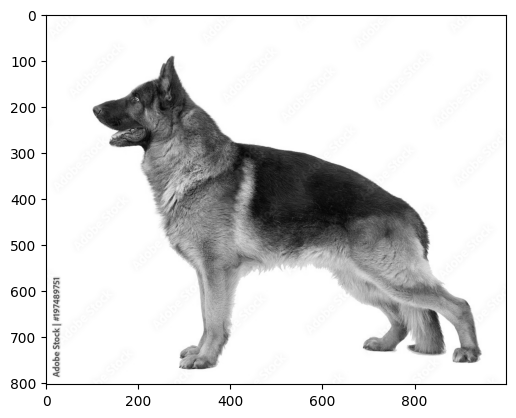

In [3]:
plt.imshow(imgGray1, cmap='gray')

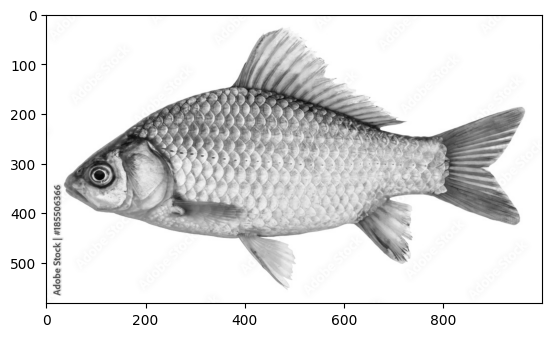

In [4]:
plt.imshow(imgGray2, cmap='gray')

In [16]:
# Estimated Gaussian kernel
kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Implementation of convolution
# Code for 3 x 3 kernel with convolution, stride = 1
def convolve(image, kernel):

    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1]
    image_depth = image.shape[2]

    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
   
    # Empty array for the output image, size of the input image
    output = np.zeros((image_height, image_width, image_depth))

    # Add padding
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2
    padded_image = np.zeros((image_height + (2 * padding_height), image_width + (2 * padding_width), image_depth))
    padded_image[padding_height:-padding_height, padding_width:-padding_width, :] = image

    # All the rows
    for y in range(image_height):
        # All the pixels
        for x in range(image_width):
            # All the color channels
            for z in range(image_depth):
                # Mat or kernel frame, part of the image to perform convolution
                mat = image[y:y + kernel_height, x:x + kernel_width, z]
                
                # Perform convolution
                #output[y, x, z] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers clip to 0 -> 255 range
    if(np.min(output) < 0):
        output = np.clip(output, 0, 255)

    # Return the image
    return(mat,kernel)
    #return np.uint8(output)

# Send the image to convolution function
convolve_image1 = convolve(imgGray1, kernel)
convolve_image2 = convolve(imgGray2, kernel)
print(convolve_image1)
# plt.imshow(convolve_image1, cmap='gray')
# plt.imshow(convolve_image2, cmap='gray')

(array([[255]], dtype=uint8), array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]]))


In [ ]:
kernelX = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernelY = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Prewitt X edge detecttion
prewittX = convolve(convolve_image1, kernelX)

# Prewitt Y edge detection
prewittY = convolve(convolve_image2, kernelY)

plt.imshow(prewittX, cmap='gray')
plt.imshow(prewittY, cmap='gray')

NameError: name 'convolve_image1' is not defined

In [ ]:
Prewitt = cv2.add(prewittX, prewittY)

hybrid_image = prewittX + prewittY

plt.imshow(hybrid_image, cmap='gray')

NameError: name 'prewittX' is not defined